# 3. Models

In [114]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,ShuffleSplit, cross_validate
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
from babel.numbers import format_currency
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.svm import SVC  
from xgboost import XGBClassifier
import random
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score, precision_recall_curve
from mlxtend.classifier import EnsembleVoteClassifier

seed = 0

def confusion_mx(y, y_predict, labels = [0,1]):
    cm = confusion_matrix(y, predictions, labels)
    plt.figure(figsize=(4,3))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels([0, 1])
    ax.yaxis.set_ticklabels([0, 1])
    plt.show()
def predict_metrics(y, predictions):
    print(classification_report(y,predictions)) 
    print('>>> Accuracy:',np.round(accuracy_score(predictions, y),3),'<<<')
    confusion_mx(y,predictions)

'''
def get_profit(clf, x_test):
    # Define thresholds and profit/cost per answer
    thresholds, c = np.arange(0, 1, 0.025), 1
    revenue_answer, expense_answer = 11, 3
    
    # predict with model
    y_prob = clf.predict_proba(x_test)[:,c]
    revenues = []
    dict_thresholds = {}
    i=0
    for t in thresholds:
        y_pred = [0 if v < t else 1 for v in y_prob]
        cm = confusion_matrix(y_test, y_pred)
        revenue = cm[1][1] * revenue_answer
        expenses = cm[:, 1].sum() * expense_answer
        net_revenue = revenue - expenses
        revenues.append(net_revenue)
    
    # plot  
    plt.figure(figsize=(10,7))
    plt.plot(thresholds, revenues, marker='.', label = clf.__class__.__name__)
    plt.plot([0, 1], [0, 0], 'k--')
    plt.xlabel('\"Probability\" threshold')
    plt.ylabel("Net Revenue")
    plt.title('Profit curves on unseen data')
    plt.legend(loc='best', title="Models")
    plt.show()

    t = thresholds[np.argmax(revenues)]
    profit_dict = dict(zip(thresholds,revenues))
    max_profit = profit_dict[t]

    print("-------------------------------------------------------------------")
    print("The classification threshold wich maximizes the profit: {:.2%}".format(t))
    print("Profit:",format_currency(max_profit, 'EUR', locale='de_DE'))
    print("-------------------------------------------------------------------")
'''
def scale_data(x_train, x_test, scaler = MinMaxScaler()):
    x_train_scaled = scaler.fit_transform(x_train)
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
    x_test_scaled = scaler.transform(x_test)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
    return x_train_scaled, x_test_scaled


In [115]:
train = pd.read_excel('df_02.xlsx', index_col=0)
test = pd.read_excel('df_test_02.xlsx', index_col = 0)
train.head(1)

,AcceptedCmp1_01T,R_NumStorePurchases_01T,R_Mnt_NumWebPurchases_01T,R_Mnt_NumStorePurchases_01T,R_Mnt_NumCatalogPurchases_01T,R_MntWines_01T,R_MntMeatProducts_01T,R_MntFishProducts_01T,R_DealFrq_01T,RFM_01T,...,AcceptedCmp2_01T,Marital_Status_01T,AcceptedTot_01T,AcceptedCmp3_01T,Days_as_cust_01T,AcceptedCmp4_01T,Income_01T,AcceptedCmp5_01T,Education_01T,Response
ID,,,,,,,,,,,,,,,,,,,,,
67,0,0.816497,0.704801,0.724756,0.0,0.588731,0.481838,0.0,0.801784,0.1574,...,0,1,0.0,0,0.166024,0,0.028395,0,1,0


In [116]:
test.head(1)

,AcceptedCmp1_01T,R_NumStorePurchases_01T,R_Mnt_NumWebPurchases_01T,R_Mnt_NumStorePurchases_01T,R_Mnt_NumCatalogPurchases_01T,R_MntWines_01T,R_MntMeatProducts_01T,R_MntFishProducts_01T,R_DealFrq_01T,RFM_01T,...,AcceptedCmp2_01T,Marital_Status_01T,AcceptedTot_01T,AcceptedCmp3_01T,Days_as_cust_01T,AcceptedCmp4_01T,Income_01T,AcceptedCmp5_01T,Education_01T,Response
ID,,,,,,,,,,,,,,,,,,,,,
2895,0,0.745356,0.657711,0.663696,0.460157,0.306529,0.608015,0.695128,0.534522,0.836929,...,0,1,0.0,0,0.127624,0,0.039571,0,0,0


# Nr. features to keep

In [117]:
def top_features(df, top):
    tmp = df.iloc[:,:top]
    tmp = pd.concat([tmp,df.Response],axis=1)
    return tmp

In [118]:
print('Original Data Size:\t2240\nCurrent Data Size:\t{}\nNro. of columns:\t{}\nDeleted {:.2%} of Data'.format(train.shape[0],train.shape[1],1-train.shape[0]/2240))


Original Data Size:	2240
Current Data Size:	1732
Nro. of columns:	27
Deleted 22.68% of Data


# To balance or Not

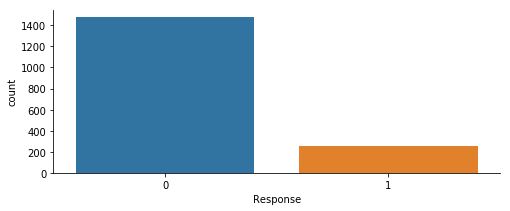

In [119]:
plt.figure(figsize=(8,3))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
ax = sns.countplot(x="Response", data=train)
plt.show()

In [120]:
# Sets
x_train = train.drop(columns='Response')
y_train = train.Response

x_test = test.drop(columns='Response')
y_test = test.Response


In [121]:
# scale Train and Test
x_train, x_test = scale_data(x_train, x_test, scaler = MinMaxScaler())

# Models
---

**1. Standard**

* Logistic
* Multinomial NB
* Bernoulli NB
* GaussianNB
* Passive Aggressive Classifier
* Label Propagation
* Label Spreading
* NUSVC
* SVC
* Random Forest Classifier
* SGD Classifier
* Decision Tree Classifier
* XGB Classifier
* Gradient Boosting Classifier
* RidgeClassifier
* KNeighborsClassifier
* QuadraticDiscriminantAnalysis
* LinearDiscriminantAnalysis
* Nearest Centroid

**2. Extras**

* Boosting
* Voting

**3. Neural Networks**

* MLP
* Keras Deep Learning

**4. Hyperparameter Tunning**
* Grid Search
* Random Search
* Keras with GA

**5. Try with decomposed features**


# ------------------------------------------------------------------------------------------

In [15]:
# models
n_jobs = -1
models = [LogisticRegression(random_state = seed, n_jobs = n_jobs),
          MLPClassifier(random_state=seed)
         ]

In [20]:
# grid

def sampling(data, column, seed):
    #random.seed(seed)
    
    num_of_1=len(data.loc[data[column]==1])
    idxs=random.sample(set(data.loc[data[column]==0].index), num_of_1)
    new_data_0 = data.loc[data.index.isin(idxs)]
    
    sample = pd.concat((new_data_0, data.loc[data[column]==1]), axis=0)
    
    y=sample[column]
    x=sample.drop(columns=column)
    
    return( x , y)


x_t, y_t = sampling(train, 'Response', seed = 0)



In [23]:
grid_dict={
    'LogisticRegression':{'C':[10, 50]},
    'MLPClassifier':{'hidden_layer_sizes': [(1),(2)]}
    }

# Add MLP to best models
n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)#KFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1']

grid_search_dict={}
for model in tqdm(models):
    model_gs = GridSearchCV(model,grid_dict[model.__class__.__name__],cv = CV,n_jobs=-1,scoring='f1',verbose=1)
    model_gs.fit(x_t,y_t)
    grid_search_dict[model.__class__.__name__]=model_gs.best_estimator_

  0%|          | 0/2 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished
 50%|█████     | 1/2 [00:03<00:03,  3.66s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
100%|██████████| 2/2 [00:05<00:00,  2.99s/it]


In [27]:
from mlxtend.classifier import EnsembleVoteClassifier
from imblearn.pipeline import make_pipeline, Pipeline
smote_ = SMOTE(random_state=seed)

In [33]:
scoring = ['accuracy','precision','recall','f1','profit', 'profit_norm']

vote_df = pd.DataFrame()

x = x_train
y = y_train

for score in tqdm(scoring):
    
    v_claf = EnsembleVoteClassifier(clfs=models, voting='soft', verbose=1)
    pipeline = make_pipeline(smote_, v_claf)
    
    if score != 'profit' and score != 'profit_norm':
        entries = []
        model_name = v_claf.__class__.__name__
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
        vote_df[score] = cv_df.groupby('model_name')[score].agg('mean')
    
    else:
        profits = []
        profits_norm = []
        revenue_answer, expense_answer = 11, 3

        revenues = []
        revenues_norm = []

        for fold_train, fold_valid in CV.split(x,y):
            pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
            y_prob = v_claf.predict_proba(x.iloc[fold_valid])[:,1]
            t = 0.5
            y_pred = [0 if v < t else 1 for v in y_prob]
            cm = confusion_matrix(y.iloc[fold_valid], y_pred)
            revenue = cm[1][1] * revenue_answer
            expenses = cm[:, 1].sum() * expense_answer
            net_revenue = revenue - expenses
            r_real = np.sum(y.iloc[fold_valid].values)*8

            revenues.append(net_revenue)
            revenues_norm.append(net_revenue/r_real)
        profits.append(np.average(revenues))
        profits_norm.append(np.average(revenues_norm))
        if score =='profit':
            vote_df[score] = profits
        else:
            vote_df[score] = profits_norm

  0%|          | 0/6 [00:00<?, ?it/s]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


 17%|█▋        | 1/6 [00:12<01:00, 12.09s/it]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


 33%|███▎      | 2/6 [00:26<00:51, 12.86s/it]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


 50%|█████     | 3/6 [00:38<00:38, 12.67s/it]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


 67%|██████▋   | 4/6 [00:50<00:24, 12.37s/it]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


 83%|████████▎ | 5/6 [01:02<00:12, 12.16s/it]

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


100%|██████████| 6/6 [01:13<00:00, 12.01s/it]


,accuracy,precision,recall,f1,profit,profit_norm
model_name,,,,,,
EnsembleVoteClassifier,0.870083,0.543933,0.806637,0.648048,227.8,0.552027


In [37]:
test_x = test.drop(columns='Response')
test_y = test.Response

In [43]:
y_scores = pipeline.predict_proba(test_x)

In [110]:
max_profits = []

best_t = []
revenue_answer, expense_answer = 11, 3


thresholds, c = np.arange(0, 1, 0.025), 1
revenue_answer, expense_answer = 11, 3

for fold_train, fold_valid in CV.split(x,y):
    #
    v_claf = EnsembleVoteClassifier(clfs=models, voting='soft', verbose=1)
    pipeline = make_pipeline(smote_, v_claf)
    
    pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])

    revenues = []
    
    
    y_prob = v_claf.predict_proba(x.iloc[fold_valid])[:,1]
    
    for t in thresholds:
        y_pred = [0 if v < t else 1 for v in y_prob]
        cm = confusion_matrix(y.iloc[fold_valid], y_pred)
        revenue = cm[1][1] * revenue_answer
        expenses = cm[:, 1].sum() * expense_answer
        net_revenue = revenue - expenses
        revenues.append(net_revenue)
        
        
    t = thresholds[np.argmax(revenues)]
    profit_dict = dict(zip(thresholds,revenues))
    max_profits.append(profit_dict[t])
    #max_profits.append(max_profit)
    best_t.append(t)

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)
Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


In [87]:
print(list(zip(best_t,max_profits)))
print(np.mean(best_t))
print(np.mean(max_profits))

mean_t = np.mean(best_t)

[(0.625, 289), (0.4, 264), (0.6000000000000001, 186), (0.5750000000000001, 260), (0.525, 230)]
0.545
245.8


In [95]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0, 1.01]);
    plt.xlim([0, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [99]:
# fit dados todos

In [111]:
pipeline.fit(x,y)

Fitting 2 classifiers...
Fitting clf1: logisticregression (1/2)
Fitting clf2: mlpclassifier (2/2)


Pipeline(memory=None,
     steps=[('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=0, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('ensemblevoteclassifier', EnsembleVoteClassifier(clfs=[LogisticRegression(C=1.0, class_weight...verbose=False, warm_start=False)],
            refit=True, verbose=1, voting='soft', weights=None))])

In [112]:
y_scores = pipeline.predict_proba(test_x)[:, 1]

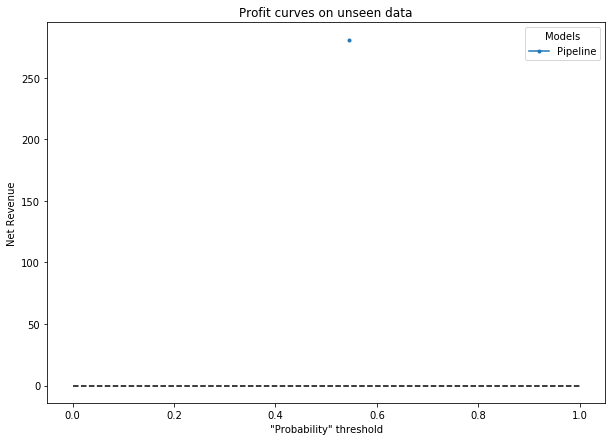

-------------------------------------------------------------------
The classification threshold wich maximizes the profit: 54.50%
Profit: 281,00 €
-------------------------------------------------------------------


In [113]:
# Define thresholds and profit/cost per answer
thresholds, c = [mean_t], 1
revenue_answer, expense_answer = 11, 3

# predict with model
y_prob = pipeline.predict_proba(x_test)[:,c]
revenues = []
dict_thresholds = {}
i=0
for t in thresholds:
    y_pred = [0 if v < t else 1 for v in y_prob]
    cm = confusion_matrix(y_test, y_pred)
    revenue = cm[1][1] * revenue_answer
    expenses = cm[:, 1].sum() * expense_answer
    net_revenue = revenue - expenses
    revenues.append(net_revenue)

# plot  
plt.figure(figsize=(10,7))
plt.plot(thresholds, revenues, marker='.', label = pipeline.__class__.__name__)
plt.plot([0, 1], [0, 0], 'k--')
plt.xlabel('\"Probability\" threshold')
plt.ylabel("Net Revenue")
plt.title('Profit curves on unseen data')
plt.legend(loc='best', title="Models")
plt.show()

t = thresholds[np.argmax(revenues)]
profit_dict = dict(zip(thresholds,revenues))
max_profit = profit_dict[t]

print("-------------------------------------------------------------------")
print("The classification threshold wich maximizes the profit: {:.2%}".format(t))
print("Profit:",format_currency(max_profit, 'EUR', locale='de_DE'))
print("-------------------------------------------------------------------")

In [105]:
p, r, thresholds = precision_recall_curve(test_y, y_scores)

     pred_neg  pred_pos
neg       357        24
pos        30        37


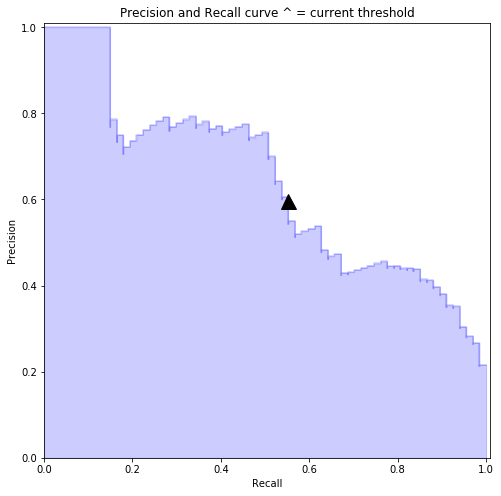

In [106]:
precision_recall_threshold(p, r, thresholds, t=mean_t)

# ------------------------------------------------------------------------------------------

In [14]:

n_jobs = -1
models= [LogisticRegression(random_state = seed, n_jobs = n_jobs),
         MultinomialNB(),
         BernoulliNB()]#,
         '''
         GaussianNB(),
         #PassiveAggressiveClassifier(random_state=seed, n_jobs = n_jobs), # parece ser bom
         #NuSVC(random_state=seed, gamma='scale',probability=True), # bom
         LabelPropagation(n_jobs = n_jobs, alpha = 0, kernel='knn'),
         LabelSpreading(n_jobs = n_jobs, kernel = 'knn'),
         RandomForestClassifier(random_state = seed,n_jobs = n_jobs),
         SGDClassifier(random_state = seed,n_jobs = n_jobs,loss='log'),
         DecisionTreeClassifier(random_state = seed),
         XGBClassifier(random_state = seed,n_jobs = n_jobs),
         GradientBoostingClassifier(random_state = seed),
         #RidgeClassifier(random_state = seed),
         SVC(random_state = seed,kernel='linear',probability=True),
         KNeighborsClassifier(n_jobs = n_jobs),
         #NearestCentroid(),
         QuadraticDiscriminantAnalysis(),
         LinearDiscriminantAnalysis()]
    '''
#RadiusNeighborsClassifier(n_jobs=-1, radius=10, weights ='uniform') #podre


In [131]:
n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)#KFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1'] #accuracy #precision #recall #f1
#entries = []

x = x_train
y = y_train 

from imblearn.pipeline import make_pipeline, Pipeline
smote_ = SMOTE(random_state=seed)


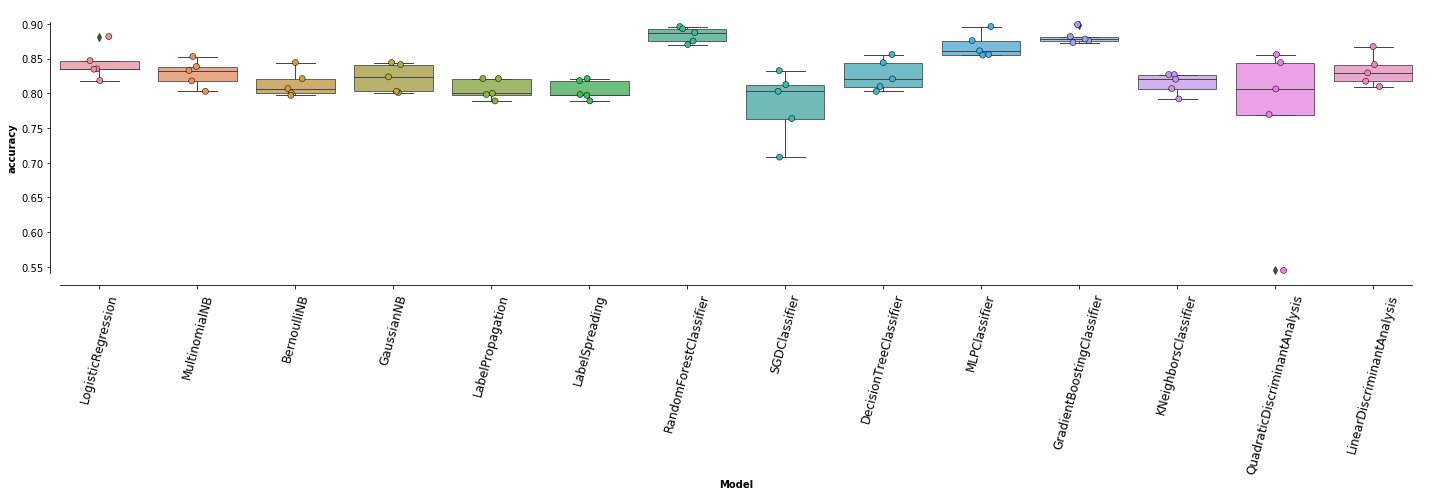

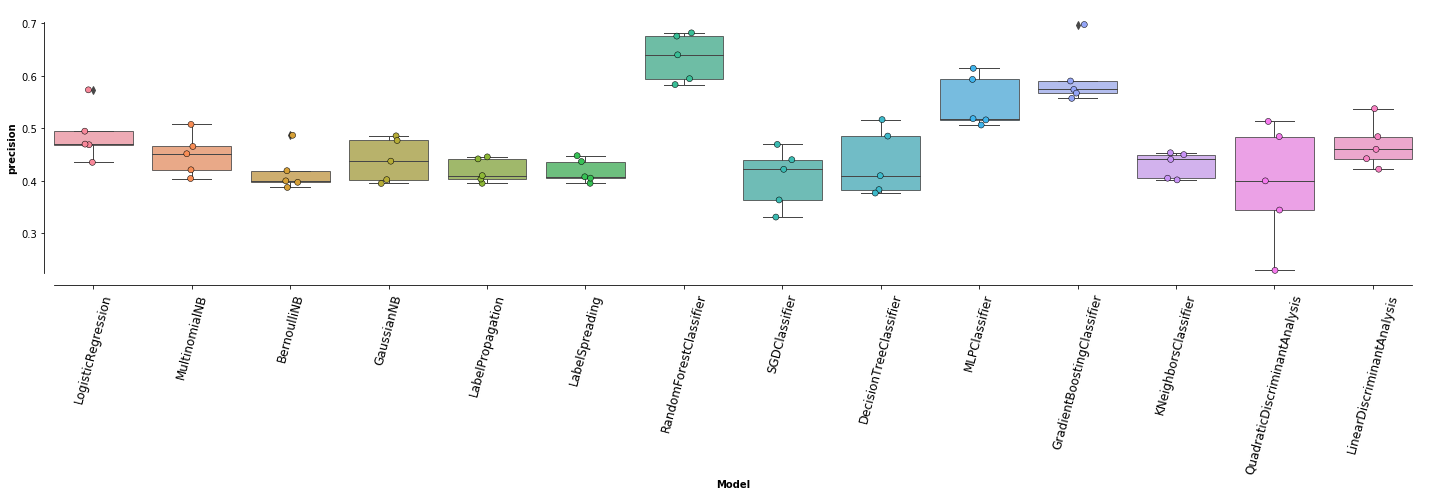

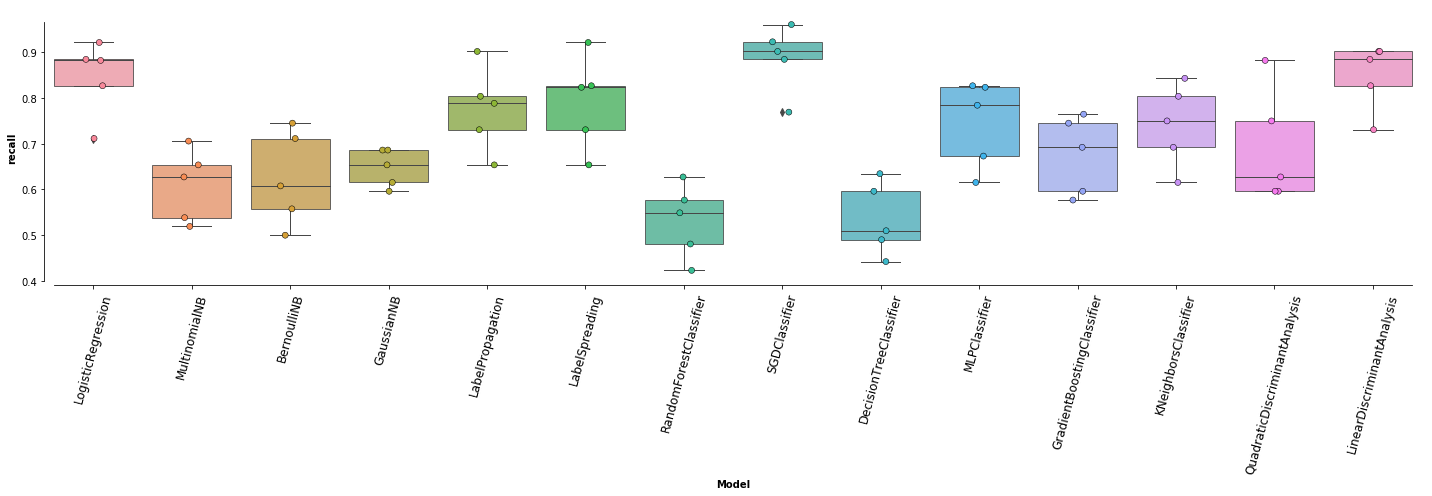

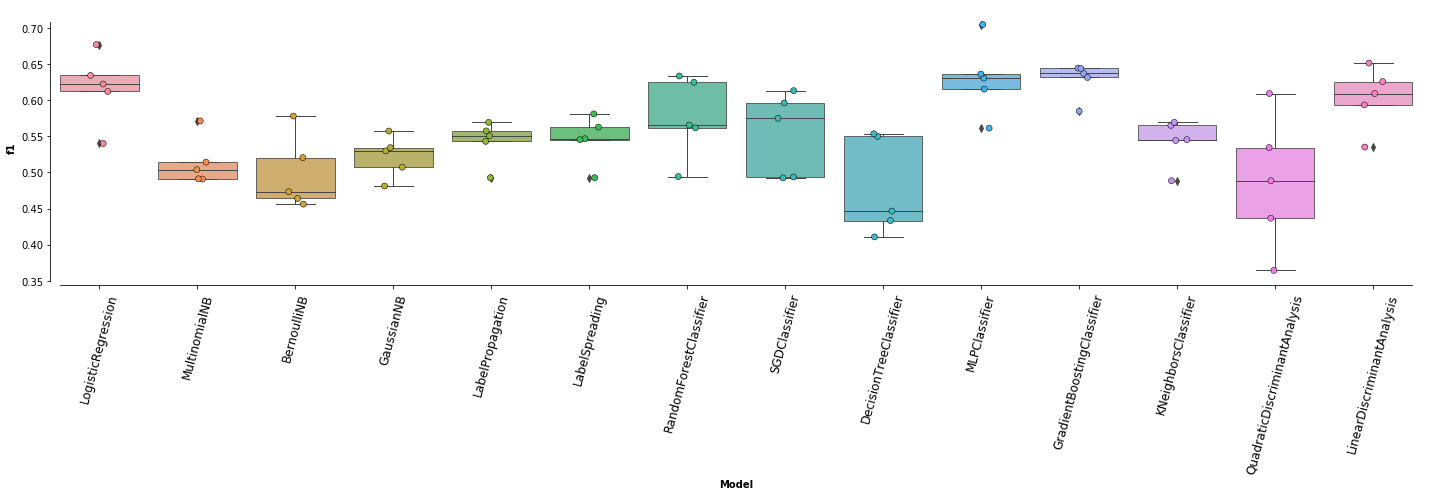

In [132]:
cv_scorings = pd.DataFrame()
n_jobs = -1
models = [LogisticRegression(random_state = seed, n_jobs = n_jobs),
         MultinomialNB(),
         BernoulliNB(),
         GaussianNB(),
         LabelPropagation(n_jobs = n_jobs, alpha = 0, kernel='knn'),
         LabelSpreading(n_jobs = n_jobs, kernel = 'knn'),
         RandomForestClassifier(random_state = seed,n_jobs = n_jobs),
         SGDClassifier(random_state = seed,n_jobs = n_jobs,loss='log'),
         DecisionTreeClassifier(random_state = seed),
          MLPClassifier(random_state=seed),
         #XGBClassifier(random_state = seed,n_jobs = n_jobs),
         GradientBoostingClassifier(random_state = seed),
         #SVC(random_state = seed,kernel='linear',probability=True),
         KNeighborsClassifier(n_jobs = n_jobs),
         #NearestCentroid(),
         QuadraticDiscriminantAnalysis(),
         LinearDiscriminantAnalysis()]

cv_df_2 = pd.DataFrame()
for score in scoring:
    entries = []
    for model in models:
        # Pipeline to oversample using smote
        pipeline = make_pipeline(smote_, model)
        
        model_name = model.__class__.__name__
        '''
        if model_name == 'SVC' or model_name == 'XGBClassifier':
            # got to transform into a matrix
            accuracies = cross_val_score(pipeline,  x.as_matrix(), y.as_matrix(), scoring= score, cv=CV)
            
        else:
            accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        '''
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)   
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])

    # Plot different models
    plt.figure(figsize = (20,7))
    ax = sns.boxplot(x='model_name', y=score, data=cv_df,boxprops=dict(alpha=.8),linewidth=1)
    sns.stripplot(x='model_name', y=score, data=cv_df, 
                  size=6, jitter=True, edgecolor="black", linewidth=.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize =12) 
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    plt.xlabel('Model',  fontweight = "bold")
    plt.ylabel(score,  fontweight = "bold")
    #plt.gcf().subplots_adjust(top = 0.15)
    #plt.gcf().subplots_adjust(bottom = 0.15)
    plt.tight_layout()
    plt.savefig(score+'_base_models.png')
    plt.show()
    
    cv_scorings[score] = cv_df.groupby('model_name')[score].agg('mean')

In [17]:
cv_scorings.reset_index(inplace=True)

In [18]:
from sklearn.model_selection import cross_val_predict

profits = []
profits_norm = []

for model in models:
    revenue_answer, expense_answer = 11, 3

    revenues = []
    revenues_norm = []
    pipeline = make_pipeline(smote_, model)
    
    for fold_train, fold_valid in CV.split(x,y):
        pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
        y_prob = model.predict_proba(x.iloc[fold_valid])[:,1]
        t = 0.5
        y_pred = [0 if v < t else 1 for v in y_prob]
        cm = confusion_matrix(y.iloc[fold_valid], y_pred)
        revenue = cm[1][1] * revenue_answer
        expenses = cm[:, 1].sum() * expense_answer
        net_revenue = revenue - expenses
        r_real = np.sum(y.iloc[fold_valid].values)*8

        revenues.append(net_revenue)
        revenues_norm.append(net_revenue/r_real)
        

    profits.append(np.average(revenues))
    profits_norm.append(np.average(revenues_norm))

In [19]:
profit_df = pd.DataFrame({'model_name':[x.__class__.__name__ for x in models], 'profit':profits, 'profit_norm':profits_norm})

In [20]:
# add to cv dataframe
cv_final_board = cv_scorings.merge(profit_df, how = 'inner',on='model_name')

In [22]:
cv_final_board.sort_values(by=['profit'],ascending = False,inplace=True)
cv_final_board
#print(cv_final_board.sort_values(by=['profit'],ascending = False).index)
#print(cv_final_board.sort_values(by=['f1'],ascending = False).index)

,model_name,accuracy,precision,recall,f1,profit,profit_norm
8,LogisticRegression,0.843519,0.488400,0.845400,0.617311,210.2,0.509285
3,GradientBoostingClassifier,0.881632,0.597244,0.675038,0.628470,205.8,0.498822
7,LinearDiscriminantAnalysis,0.833121,0.469248,0.849246,0.603079,200.4,0.485502
11,RandomForestClassifier,0.884521,0.635084,0.531448,0.576100,180.2,0.436633
12,SGDClassifier,0.784043,0.405298,0.887934,0.554179,159.4,0.385756
6,LabelSpreading,0.804832,0.418597,0.791327,0.545785,156.0,0.378035
4,KNeighborsClassifier,0.814658,0.430256,0.740950,0.542594,153.2,0.371324
5,LabelPropagation,0.805988,0.419274,0.775792,0.542709,153.2,0.371239
2,GaussianNB,0.822726,0.439500,0.647587,0.522018,137.6,0.333305
9,MultinomialNB,0.829063,0.450028,0.608974,0.514358,134.2,0.324981


# Select k best models

In [23]:
k = 4
k_best_models = cv_final_board[:k]['model_name'].values
k_best_models = [model for model in models if model.__class__.__name__ in (k_best_models)]
print([model.__class__.__name__ for model in k_best_models])

['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'LinearDiscriminantAnalysis']


In [89]:
cv_final_board[:4].index

Int64Index([8, 3, 7, 11], dtype='int64')

## Ensemble

In [24]:
# Voting
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [25]:

n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1','profit', 'profit_norm']

vote_df = pd.DataFrame()


for score in scoring:
    
    v_claf = EnsembleVoteClassifier(clfs=k_best_models, voting='soft', verbose=0)
    pipeline = make_pipeline(smote_, v_claf)
    
    if score != 'profit' and score != 'profit_norm':
        entries = []
        model_name = v_claf.__class__.__name__
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
        vote_df[score] = cv_df.groupby('model_name')[score].agg('mean')
    
    else:
        profits = []
        profits_norm = []
        revenue_answer, expense_answer = 11, 3

        revenues = []
        revenues_norm = []

        for fold_train, fold_valid in CV.split(x,y):
            pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
            y_prob = v_claf.predict_proba(x.iloc[fold_valid])[:,1]
            t = 0.5
            y_pred = [0 if v < t else 1 for v in y_prob]
            cm = confusion_matrix(y.iloc[fold_valid], y_pred)
            revenue = cm[1][1] * revenue_answer
            expenses = cm[:, 1].sum() * expense_answer
            net_revenue = revenue - expenses
            r_real = np.sum(y.iloc[fold_valid].values)*8

            revenues.append(net_revenue)
            revenues_norm.append(net_revenue/r_real)
        profits.append(np.average(revenues))
        profits_norm.append(np.average(revenues_norm))
        if score =='profit':
            vote_df[score] = profits
        else:
            vote_df[score] = profits_norm

Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (4/4)
Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (4/4)
Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (4/4)
Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (4/4)
Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (

In [27]:
vote_df

,accuracy,precision,recall,f1,profit,profit_norm
model_name,,,,,,
EnsembleVoteClassifier,0.875865,0.562949,0.802866,0.658296,232.8,0.564263


# Grid search
---

In [28]:
def sampling(data, column, seed):
    #random.seed(seed)
    
    num_of_1=len(data.loc[data[column]==1])
    idxs=random.sample(set(data.loc[data[column]==0].index), num_of_1)
    new_data_0 = data.loc[data.index.isin(idxs)]
    
    sample = pd.concat((new_data_0, data.loc[data[column]==1]), axis=0)
    
    y=sample[column]
    x=sample.drop(columns=column)
    
    return( x , y)

In [29]:
x_t, y_t = sampling(train, 'Response', seed)

In [83]:
grid_dict={
    'LogisticRegression':{'C':[100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                    'penalty':['l1','l2']},
    'LabelPropagation':{'kernel': ['knn'],
                  'n_neighbors':[3,5,10,20,50],
                  'max_iter': [1000, 1250, 1500, 1750, 2000]},
    'LabelSpreading':{'kernel': ['knn'],
                  'max_iter': [1000, 2000],
                  'n_neighbors':[3,5,10,20,50],
                  'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
                  'max_iter': [1000, 1250, 1500, 1750, 2000]},
    'RandomForestClassifier':{'bootstrap': [True, False],
                 'max_depth': [10, 30, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [10, 50, 100, 200]},
    'SGDClassifier':{'solver': ['svd', 'lsqr'],
              'shrinkage':[None],
              'n_components': [None]},
    'GradientBoostingClassifier':{"loss":["deviance"],
              "learning_rate": [0.05, 0.1, 0.2],
              "min_samples_split": np.linspace(0.1, 0.5, 10),
              "min_samples_leaf": np.linspace(0.1, 0.5, 10),
              "max_depth":[3,5],
              "max_features":["log2","sqrt"],
              "criterion": ["friedman_mse"],
              "subsample":[0.5, 1.0],
              "n_estimators":[10, 100]},
    'KNeighborsClassifier':{'weights': ['uniform', 'distance'],
              'n_neighbors':[3,5,10,20,50],
              'metric': ['euclidean', 'manhattan', 'minkowski']},
    'LinearDiscriminantAnalysis':{'solver': ['svd', 'lsqr'],
              'shrinkage':[None],
              'n_components': [None]},
    'MLPClassifier':{'hidden_layer_sizes': [(1),(2),(2,2),(3),(3,3),],
                  'solver': ['sgd', 'adam','lbfgs'],
                  'alpha': 10.0 ** -np.arange(1, 5),
                  'momentum':np.arange(0,0.1, 0.2),
                  'max_iter': [200,500],
                  'learning_rate': ['constant']}
    
}

In [71]:
# Add MLP to best models
k_best_models.append(MLPClassifier(random_state=seed))

In [79]:
grid_search_dict={}
for model in tqdm(k_best_models):
    model_gs = GridSearchCV(model,grid_dict[model.__class__.__name__],cv = CV,n_jobs=-1,scoring='f1',verbose=1)
    model_gs.fit(x_t,y_t)
    grid_search_dict[model.__class__.__name__]=model_gs.best_estimator_


  0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Parameter values for parameter (min_samples_leaf) need to be a non-empty sequence.

### voting with models from grid search

In [ ]:
# Voting
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [79]:

n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1','profit', 'profit_norm']

vote_df_grid = pd.DataFrame()


for score in scoring:
    
    v_claf = EnsembleVoteClassifier(clfs=list(grid_search_dict.values()), voting='soft', verbose=1)
    pipeline = make_pipeline(smote_, v_claf)
    
    if score != 'profit' and score != 'profit_norm':
        entries = []
        model_name = v_claf.__class__.__name__
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
        vote_df_grid[score] = cv_df.groupby('model_name')[score].agg('mean')
    
    else:
        profits = []
        profits_norm = []
        revenue_answer, expense_answer = 11, 3

        revenues = []
        revenues_norm = []

        for fold_train, fold_valid in CV.split(x,y):
            pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
            y_prob = v_claf.predict_proba(x.iloc[fold_valid])[:,1]
            t = 0.5
            y_pred = [0 if v < t else 1 for v in y_prob]
            cm = confusion_matrix(y.iloc[fold_valid], y_pred)
            revenue = cm[1][1] * revenue_answer
            expenses = cm[:, 1].sum() * expense_answer
            net_revenue = revenue - expenses
            r_real = np.sum(y.iloc[fold_valid].values)*8

            revenues.append(net_revenue)
            revenues_norm.append(net_revenue/r_real)
        profits.append(np.average(revenues))
        profits_norm.append(np.average(revenues_norm))
        if score =='profit':
            vote_df[score] = profits
        else:
            vote_df[score] = profits_norm

Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)
Fitting clf3: gradientboostingclassifier (3/4)
Fitting clf4: lineardiscriminantanalysis (4/4)
Fitting 4 classifiers...
Fitting clf1: logisticregression (1/4)
Fitting clf2: randomforestclassifier (2/4)


KeyboardInterrupt: 

In [78]:
vote_df_grid

,accuracy,precision,recall,f1,profit,profit_norm
model_name,,,,,,
EnsembleVoteClassifier,0.879322,0.571755,0.802866,0.665068,236.4,0.57286


# MLP
---

In [57]:
mlp_param_grid = {'hidden_layer_sizes': [(1),(2),(2,2),(3),(3,3),],
                  'solver': ['sgd', 'adam','lbfgs'],
                  'alpha': 10.0 ** -np.arange(1, 5),
                  'momentum':np.arange(0,0.1, 0.2),
                  'max_iter': [200,500],
                  'learning_rate': ['constant']}
    
model = MLPClassifier(random_state=seed)


In [58]:
ml_grid = GridSearchCV(model,mlp_param_grid, cv = CV, n_jobs=-1,scoring='f1',verbose=1)
ml_grid.fit(x_t, y_t)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 5182 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed:  8.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [1, 2, (2, 2), 3, (3, 3)], 'solver': ['lbfgs'], 'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]), 'momentum': array([0.1   , 0.01  , 0.001 , 0.0001]), 'nesterovs_momentum': [True, False], 'max_iter': [500, 600], 'learning_rate': ['constant'], 'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_j

In [60]:
ml_grid.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': 1,
 'learning_rate': 'constant',
 'max_iter': 500,
 'momentum': 0.1,
 'nesterovs_momentum': True,
 'solver': 'lbfgs'}

In [62]:
#pipeline = make_pipeline(smote_, ml_grid.best_estimator_)
#accuracies = cross_val_score(pipeline, x, y, scoring= 'score', cv=CV)

In [63]:

n_splits = 5
CV = StratifiedKFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = ['accuracy','precision','recall','f1','profit', 'profit_norm']

#vote_df_grid = pd.DataFrame()

mlp_df = pd.DataFrame()

for score in scoring:
    model = ml_grid.best_estimator_
    #v_claf = EnsembleVoteClassifier(clfs=list(grid_search_dict.values()), voting='soft', verbose=1)
    pipeline = make_pipeline(smote_, model)
    
    if score != 'profit' and score != 'profit_norm':
        entries = []
        model_name = v_claf.__class__.__name__
        accuracies = cross_val_score(pipeline, x, y, scoring= score, cv=CV)
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
        mlp_df[score] = cv_df.groupby('model_name')[score].agg('mean')
    
    else:
        profits = []
        profits_norm = []
        revenue_answer, expense_answer = 11, 3

        revenues = []
        revenues_norm = []

        for fold_train, fold_valid in CV.split(x,y):
            pipeline.fit(x.iloc[fold_train],y.iloc[fold_train])
            y_prob = model.predict_proba(x.iloc[fold_valid])[:,1]
            t = 0.5
            y_pred = [0 if v < t else 1 for v in y_prob]
            cm = confusion_matrix(y.iloc[fold_valid], y_pred)
            revenue = cm[1][1] * revenue_answer
            expenses = cm[:, 1].sum() * expense_answer
            net_revenue = revenue - expenses
            r_real = np.sum(y.iloc[fold_valid].values)*8

            revenues.append(net_revenue)
            revenues_norm.append(net_revenue/r_real)
        profits.append(np.average(revenues))
        profits_norm.append(np.average(revenues_norm))
        if score =='profit':
            mlp_df[score] = profits
        else:
            mlp_df[score] = profits_norm

In [64]:
mlp_df

,accuracy,precision,recall,f1,profit,profit_norm
model_name,,,,,,
EnsembleVoteClassifier,0.818685,0.446353,0.8454,0.582579,184.4,0.446785


# Specific Model (trial)

In [ ]:
#model = bagging_clf = BaggingClassifier(GradientBoostingClassifier(random_state = seed))#, random_state=seed, n_jobs = -1)#SVC(probability=True)#RandomForestClassifier(random_state = seed,n_jobs = n_jobs)
#v_claf = EnsembleVoteClassifier(clfs=k_best_models, voting='soft',verbose=1)

pipeline = make_pipeline(smote_, clf_gscv)
pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_test)
y_scores = clf_gscv.predict_proba(x_test)[:, 1]


In [ ]:
y_scores = pipeline.predict_proba(x_test)[:, 1]

In [ ]:
predict_metrics(y_test,predictions)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
def plot_roc_auc(roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('AUROC Curve')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
plot_roc_auc(roc_auc)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scores)
average_precision

In [ ]:
from sklearn.utils.fixes import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(10,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [ ]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds,t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(10,7))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0, 1]);
    plt.xlim([0, 1]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)



In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
precision_recall_threshold(precision, recall, thresholds,  t = 0.5)

In [ ]:
#get_profit(model, x_test)

---

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    
    lr_model.fit(x_train,y_train)
    pred_prob = lr_model.predict_proba(x_test)[:,1]

    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)
    print('weight:',w, '\tPR Value:',average_precision_score(y_test, pred_prob))
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

# Neural Networks
---

### 1. MLP w gird search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100,random_state=seed)

parameter_space = {
    'hidden_layer_sizes': [(3), (5,5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'momentum':np.arange(0, 1.2, 0.2),
    'nesterovs_momentum': [True,False],
    'alpha': 10.0 ** -np.arange(1, 5),
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2, verbose=1)
clf.fit(x_train, y_train)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
predictions = clf.predict(x_test)
predict_metrics(y_test,predictions)

In [ ]:
y_scores = clf.predict_proba(x_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plot_roc_auc(roc_auc)

In [ ]:
average_precision = average_precision_score(y_test, y_scores)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(10,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [ ]:
get_profit(clf, x_test)

# Roc Curve

In [ ]:
# the classifiers
architectures = {"3": (3), "5": (5), "3x3": (3,3), "6x6": (6,6)}
clfs_ = {}

for key, value in tqdm(architectures.items()):
    mlp = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=value, 
                        max_iter=500, random_state=seed)
    mlp.fit(x_train, y_train)
    clfs_["mlp_"+key] = mlp

print("Candidate models: ", clfs_.keys())

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

c=1
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
thresholds = []
for key, value in clfs_.items():
    y_pred=value.predict_proba(x_test)[:, c]
    fpr, tpr, t = roc_curve(y_test, y_pred)
    thresholds.append(t)
    auroc = roc_auc_score(y_test, y_pred, average="weighted")
    plt.plot(fpr, tpr, marker='.', label = key + " (AUROC {:.2f}".format(auroc) + ")")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: moons unbalanced classification problem')
plt.legend(loc='best', title="Models")
plt.show()

# Precision - Recall Curve

Good for unbalanced Problems

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

c=1
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0.5, 0.5], 'k--')
for key, value in clfs_.items():
    y_pred = value.predict_proba(x_test)[:, c]
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    auroc = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label = key + " (AUPR {:.2f}".format(auroc) + ")")

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR curve on unseen data')
plt.legend(loc='best', title="Models")
plt.show()

# Tuning with parfit

In [ ]:
#import scikitplot as skplt

model = RandomForestClassifier(random_state = seed,n_jobs = n_jobs)
model.fit(x_train,y_train)

y_prob = model.predict_proba(x_test)[:, 1]

In [ ]:
model = RandomForestClassifier(random_state = seed,n_jobs = n_jobs)
paramGrid = {
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [seed]
}

clf = GridSearchCV(model, paramGrid, n_jobs=-1, cv=2, verbose=1)
clf.fit(x_train,y_train)
#clf.fit(x_train, y_train)

In [ ]:
y_scores = clf.predict_proba(x_test)[:, 1]

average_precision = average_precision_score(y_test, y_scores)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(10,7))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

get_profit(clf, x_test)


# Deriving Classification Threshold

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score, precision_recall_curve
mlp_param_grid = {'hidden_layer_sizes': [(3), (6), (3, 3), (5, 5)], 
                  'learning_rate_init': [0.001, 0.01]}

model = MLPClassifier(random_state=seed)
clf_gscv = GridSearchCV(model, mlp_param_grid, cv=5, n_jobs=-1, 
                        scoring=make_scorer(average_precision_score))

# fit 
clf_gscv.fit(x_train, y_train)

# analyze
print("Best parameter set: ", clf_gscv.best_params_, "\n")
means = clf_gscv.cv_results_['mean_test_score']
stds = clf_gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_gscv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# generalization ability in terms of profit

In [ ]:
#predictions = clf_gscv.best_estimator_.predict(x_test)
#predict_metrics(y_test,predictions)


In [ ]:
clf = clf_gscv.best_estimator_
get_profit(clf, x_test)

# ---------------------------------------------------------------

# Logistic

In [ ]:
clf = LogisticRegression(random_state = seed, n_jobs = n_jobs)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
predict_metrics(y_test, predictions)

In [ ]:
get_profit(clf, x_test)

In [ ]:
import scikitplot as skplt
y_prob = clf.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test, y_prob,figsize=(10,5))
plt.show()

### !!fazer uma generalizacao do teste ks com profit para decidir threshold!!

# Plots 

# Adjusting Threshold

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [ ]:
y_scores = clf.predict_proba(x_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [ ]:
def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0, 1]);
    plt.xlim([0, 1]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [ ]:
precision_recall_threshold(p, r,0.5)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    #plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [ ]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [ ]:
threshold = 0.5

predicted_proba = clf.predict_proba(x_test)
predictions = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predictions)
accuracy

In [ ]:
predict_metrics(y_test, predictions)

# Deep Learning

In [ ]:
from tensorflow.keras import models, Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize = (12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label = 'Trainning acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Trainning and Validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label = 'Trainning loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Trainning and Validation loss')
    plt.legend()


In [ ]:
input_dim = x_test.shape[1]

model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [ ]:
epochs = 165
history = model.fit(x_train, y_train,epochs=epochs,batch_size=30, validation_split = 0.1)


In [ ]:
plot_history(history)

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose = False)
print("Trainning Accuracy: {:.2%}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose = False)
print("Test Accuracy: {:.2%}".format(accuracy))

In [ ]:
predictions = model.predict(x_test)
predictions = [int(np.round(x[0])) for x in predictions]

In [ ]:
predict_metrics(y_test, predictions)

# Ensemble

## 1. Models

In [ ]:
# knn

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(x_train, y_train)

In [ ]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

In [ ]:
# Random Forest

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(x_train, y_train)

In [ ]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

In [ ]:
# Logistic Regression

#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(x_train, y_train)

In [ ]:
print('knn: {:.2%}'.format(knn_best.score(x_test, y_test)))
print('rf: {:.2%}'.format(rf_best.score(x_test, y_test)))
print('log_reg: {:.2%}'.format(log_reg.score(x_test, y_test)))

## 2. Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)

In [ ]:
predictions = ensemble.predict(x_test)

In [ ]:
predict_metrics(y_test, predictions)

# Esemble
---

### 1. Bagging

In [ ]:
models= [LogisticRegression(random_state = seed, n_jobs = n_jobs),
         MultinomialNB(),
         BernoulliNB(),
         GaussianNB(),
         PassiveAggressiveClassifier(random_state=seed, n_jobs = n_jobs), # parece ser bom
         NuSVC(random_state=seed, gamma='scale'), # bom
         LabelPropagation(n_jobs = n_jobs, alpha = 0, kernel='knn'),
         LabelSpreading(n_jobs = n_jobs, kernel = 'knn'),
         RandomForestClassifier(random_state = seed,n_jobs = n_jobs),
         SGDClassifier(random_state = seed,n_jobs = n_jobs),
         DecisionTreeClassifier(random_state = seed),
         XGBClassifier(random_state = seed,n_jobs = n_jobs),
         GradientBoostingClassifier(random_state = seed),
         RidgeClassifier(random_state = seed),
         SVC(random_state = seed,kernel='linear'),
         KNeighborsClassifier(n_jobs = n_jobs),
         NearestCentroid(),
         QuadraticDiscriminantAnalysis(),
         LinearDiscriminantAnalysis()]


In [ ]:
from sklearn.ensemble import BaggingClassifier
#compare_models = pd.DataFrame({'acc':0})
acc_simple = []
rec_simple = []
simple_names=[]

acc_bag = []
rec_bag = []
bag_names = []

for model in tqdm(models):
    
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    #print("Original Results of: ", (model_name), '\n')
    #print(classification_report(y_test,predictions))
    
    acc_simple.append(np.round(accuracy_score(predictions, y_test),3))
    rec_simple.append(np.round(recall_score( y_test, predictions),3))
    simple_names.append(model_name)
    
    bagging_clf = BaggingClassifier(model, random_state=seed)
    
    bagging_clf.fit(x_train, y_train)
    predictions = bagging_clf.predict(x_test)
    
    
    
    #print("Bagged Results of: ", (model_name), '\n')
    #print(classification_report(y_test,predictions))
    
    acc_bag.append(np.round(accuracy_score(predictions, y_test),3))
    rec_bag.append(np.round(recall_score( y_test, predictions),3))
    bag_names.append('bag_'+model_name)


In [ ]:
simple_compare = pd.DataFrame({'acc':acc_simple, 'rec': rec_simple}, index=simple_names)
bag_compare = pd.DataFrame({'acc':acc_bag, 'rec':rec_bag}, index=bag_names)
compare_models = pd.concat([simple_compare, bag_compare])

print(compare_models.sort_values(by='acc',ascending=False)[:5])
print(compare_models.sort_values(by='rec',ascending=False)[:5])


In [ ]:
bagging_clf = BaggingClassifier(RandomForestClassifier(), random_state=seed)
bagging_clf.fit(x_train, y_train)
predictions = bagging_clf.predict(x_test)
predict_metrics(y_test, predictions)


In [ ]:
clf = bagging_clf
get_profit(clf, x_test)

### 2. Voting

In [ ]:
# Aqui estão os modelos normais

names = []
for model in models:
    model_name = model.__class__.__name__
    names.append(model_name)
model_simple_tuple_list = list(zip(names,models))

In [ ]:
from sklearn.ensemble import VotingClassifier
# Aqui estão os modelos em Bagging
bag_models = []
bag_names = []
for model in models:
    model_ = BaggingClassifier(model, random_state=seed)
    model_name = 'bag_'+model.__class__.__name__
    bag_models.append(model_)
    bag_names.append(model_name)
    
model_bagged_tuple_list = list(zip(bag_names,bag_models))

In [ ]:
model_tuple_list = model_simple_tuple_list + model_bagged_tuple_list

In [ ]:
ensemble = VotingClassifier(estimators=model_tuple_list, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)


In [ ]:
predictions = ensemble.predict(x_test)
predict_metrics(y_test, predictions)

# PCA

In [ ]:
pca = pd.read_excel('df_PCA.xlsx', index_col=0)

In [ ]:
pca.head(1)

In [ ]:
x_train, x_test, y_train, y_test = split_data(pca,balance = True, random_state = seed, test_size = 0.2, strat = True)
x_train, x_test = scale_data(x_train, x_test)



In [ ]:
n_jobs = -1
models= [LogisticRegression(random_state = seed, n_jobs = n_jobs),
         MultinomialNB(),
         BernoulliNB(),
         PassiveAggressiveClassifier(random_state=seed, n_jobs = n_jobs), # parece ser bom
         NuSVC(random_state=seed, gamma='scale'), # bom
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(random_state = seed,n_jobs = n_jobs),
         SGDClassifier(random_state = seed,n_jobs = n_jobs),
         DecisionTreeClassifier(random_state = seed),
         XGBClassifier(random_state = seed,n_jobs = n_jobs),
         GradientBoostingClassifier(random_state = seed),
         RidgeClassifier(random_state = seed),
         SVC(random_state = seed,kernel='linear'),
         KNeighborsClassifier(n_jobs = n_jobs),
         QuadraticDiscriminantAnalysis(),
         LinearDiscriminantAnalysis()]

In [ ]:
n_splits = 5
CV = KFold(n_splits=n_splits, random_state=seed)
cv_df = pd.DataFrame(index=range(n_splits * len(models)))
scoring = 'accuracy' #accuracy #precision #recall #f1
entries = []

x = x_train
y = y_train 

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x, y, scoring= scoring, cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', scoring])

In [ ]:
# Plot different models
plt.figure(figsize = (20,7))
ax = sns.boxplot(x='model_name', y=scoring, data=cv_df,boxprops=dict(alpha=.8))
sns.stripplot(x='model_name', y=scoring, data=cv_df, 
              size=6, jitter=True, edgecolor="black", linewidth=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize =12) 
plt.xlabel('Model',  fontweight = "bold")
plt.ylabel(scoring,  fontweight = "bold")
plt.show()

print(np.round(
        cv_df.groupby('model_name').agg('mean').
        sort_values(by=[scoring], 
                    ascending=False)[scoring],decimals=3)*100)

In [ ]:
clf = LogisticRegression(random_state = seed, n_jobs = n_jobs)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
predict_metrics(y_test, predictions)

# Save and Export Model

In [ ]:
from sklearn.externals import joblib

In [ ]:
# Insert here final model

model = LogisticRegression(random_state = seed, n_jobs = n_jobs)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predict_metrics(y_test, predictions)

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)


In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_scaled, y_test)
print(result)